# Individual Plan

github link: https://github.com/emily2628/Dsci-100---Individual-Plan.git

## 1. Importing Data

In [20]:
library(tidyverse)
url_players = 'https://drive.google.com/uc?export=download&id=18bYRGtsZOOfM_ZjaapVSedO5kAcqHBNC'
players <- read_csv(url_players)
head(players)

url_sessions = 'https://drive.google.com/uc?export=download&id=1r8jujQRJHYl_B8lU3Mj5ygTgCJHvNrIo'
sessions <- read_csv(url_sessions)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## 2. Data Description
The dataset records information about minecraft players and their activity on the research server.
Below are summaries showing the number of unique categories for some key variables, along with basic stats to describe the range of numeric data.
All values are rounded to two decimals where relevant.

### 2.1 Players Table

In [2]:
# distinct values for main categorical variables
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


In [3]:
# quick range of numeric variables 
players |> summarise(max(played_hours), min(played_hours), mean = round(mean(played_hours, na.rm = TRUE), 2), 
                     max(Age), min(Age), mean = round(mean(Age, na.rm = TRUE), 2))

max(played_hours),min(played_hours),mean,max(Age),min(Age)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,21.14,NA,NA


### Summary of the `Players` Table
There are 196 observations and 7 variables, the variales are:
- `experience` - character; describes the player's experience level (`Beginner`, `Regular`, `Amateur`, `Veteran`, `Pro`,)
- `subscribe` - logical; indicates whether the player subscribed to the game info (`TRUE` or `FALSE`)
- `gender` - character; player's self indentified gender
- `hashed_email` - character; anonymized hashed email address for privacy
- `played_hours` - numeric; total play time in hours (range 0-99)
- `age` - numeric; player's age (range roughly 17-99)
- `player_id` - character; unique identifier for each player

### Potential Issues
1. the variable `experience` is categorical, so it cannot be directly used in numerical analysis. It may need to be encoded later if included in a model.
2. Some gender categories have very few observations compared to other. This could make comparisons between gender groups less reliable.

### 2.2 Sessions Table

In [4]:
# distinct values for main categorical variables
distinct(sessions, hashedEmail)

hashedEmail
<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f
f2826fb8dbce4d450348f99cb27ade184b713998d9679780442efaaf218038f2
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe


In [5]:
# quick range of numeric variables 
sessions |> 
    summarise(
        latest_start_time = max(start_time, na.rm = TRUE), 
        earliest_start_time = min(start_time, na.rm = TRUE), 
        latest_end_time = max(end_time, na.rm = TRUE), 
        earliest_end_time = min(end_time, na.rm = TRUE),
        latest_original_start = max(original_start_time, na.rm = TRUE), 
        earliest_original_start = min(original_start_time, na.rm = TRUE),
        latest_original_end = max(original_end_time, na.rm = TRUE), 
        earliest_original_end = min(original_end_time, na.rm = TRUE), 
    )

latest_start_time,earliest_start_time,latest_end_time,earliest_end_time,latest_original_start,earliest_original_start,latest_original_end,earliest_original_end
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
31/08/2024 23:35,01/05/2024 00:58,31/08/2024 23:20,01/05/2024 01:24,1.72733e+12,1.7124e+12,1.72734e+12,1.7124e+12


### Summary of the `Sessions` Table
There are 1535 observations and 5 variables, the variables are:
- `hashedEmail` - anonymized player identifier (used to link to `players` table)
- `start_time` - time when the session began
- `end_time` - time when the session ended
- `original_start_time` - unadjusted start time (before any processing
- `original_end_time` - unadjusted end time (before any processing)

### Potential Issues
1. There are both processed and original timestamps in the dataset. This may indicate that time zone or clock adjustments were made, which could affect how session times are interpreted in later analysis.
2. Some sessions may have very long durations compared to typical gameplay. This could happen if players stayed logged in while inactive or if the server did not record the logout properly, which might influence average playtime results.  

## 3. Questions
### Broad Question
What player characteristics and behaviours are most predictive of subscribing to a game related newsletter, and how do these features differ between various player types 

### Specific Question 
Can player engagement variable such as total playtime (`played_hours`), experience level (`experience`), and number of interactions help predict whether a player subscribes to the game related newsletter (`subscribe`)?

### How the Data Will Help 
The `players` table includes each player's subscription status (`subscribe`) along with their characteristics and activity measures such as `played_hours`, `experience`, and `age`. These variables will help explore whether more engaged or experienced player are more likely to subscribe. 

### To prepare the data, I plan to:
1. Use the `players` table as the main dataset
2. Select `subscribe` as the response variable and variables such as `played_hours`, `experience`, and possibly session based features (from the `sessions` table) as explanatory variables.
3. If needed, join `sessions` and `players` using `hashedEmail` to calculate additional activity metric.
4. Encode categorical variables like `experience` and ensure `subscribe` is represented as a binary outcome.
5. Identify and handle any missing data or outliers that could affect model results. 

## 4. Exploratory Data Analysis and Visualization

In [21]:
# compute mean values for quantitative variables
players |>
    summarise(
        mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2), 
        mean_Age = round(mean(Age, na.rm = TRUE), 2)
    )

mean_played_hours,mean_Age
<dbl>,<dbl>
5.85,21.14


### Explanation
The average total playtime and average age show what a "typical" player looks like. These means help to interpret how far other values are from the center.

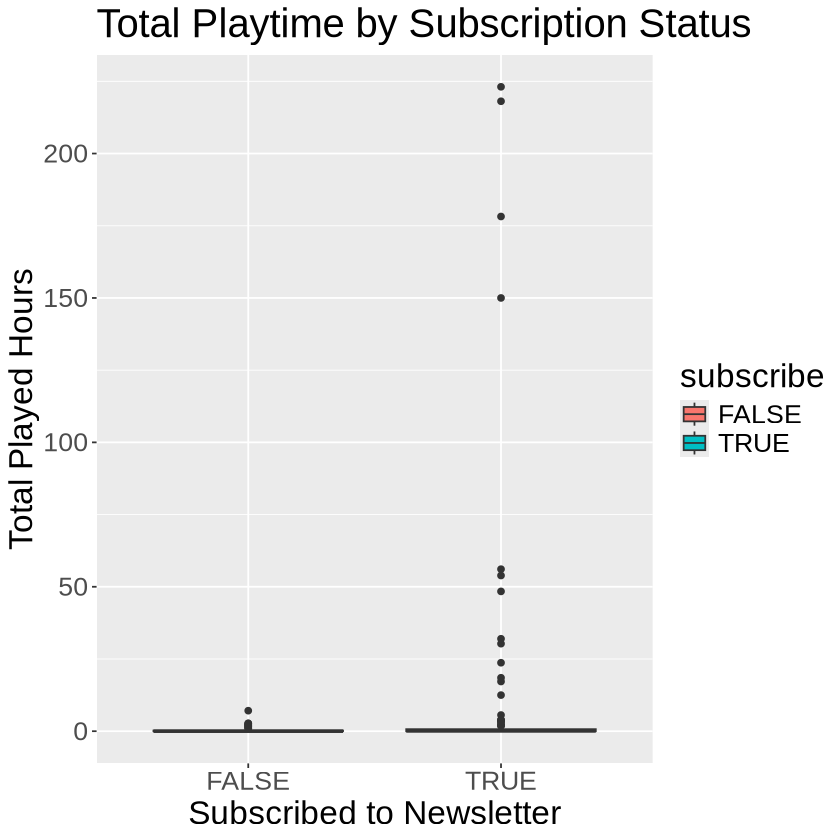

In [7]:
# playtime vs subscription

ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
    geom_boxplot() +
    labs(
        title = "Total Playtime by Subscription Status",
        x = "Subscribed to Newsletter",
        y = "Total Played Hours"
    ) +
    theme(text = element_text(size = 20))

### Interpretation
The boxplot shows that players who subscribed tend to have slightly higher total playtime than non-subscribed players, but there is overlap between the two groups. This suggests that total playtime alone does not fully explain whether a player subscribes.

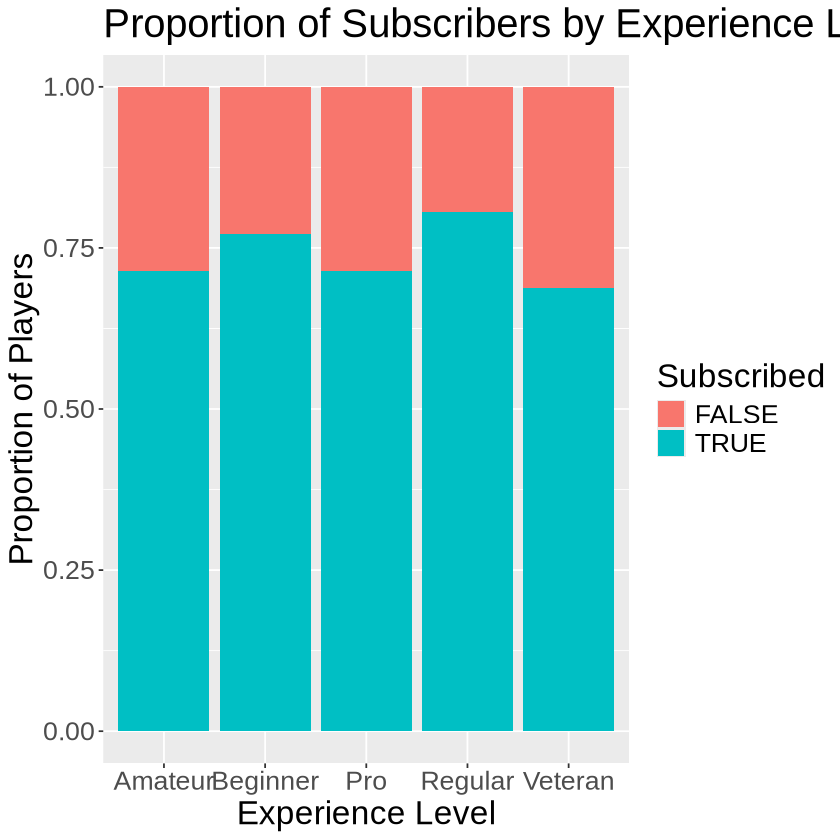

In [17]:
# Experience level vs Suscription

ggplot(players, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(
        title = "Proportion of Subscribers by Experience Level",
        x = "Experience Level",
        y = "Proportion of Players",
        fill = "Subscribed"
    ) +
    theme(text = element_text(size = 20))

### Interpretation
Contrary to what might be expected, the `Regular` players show the highest proportion of subscribers, while `Veteran` players have the lowest. This suggests that mid level players may be the most engaged or most interested in staying connected, whereas highly experienced players might already feel less need for updates.

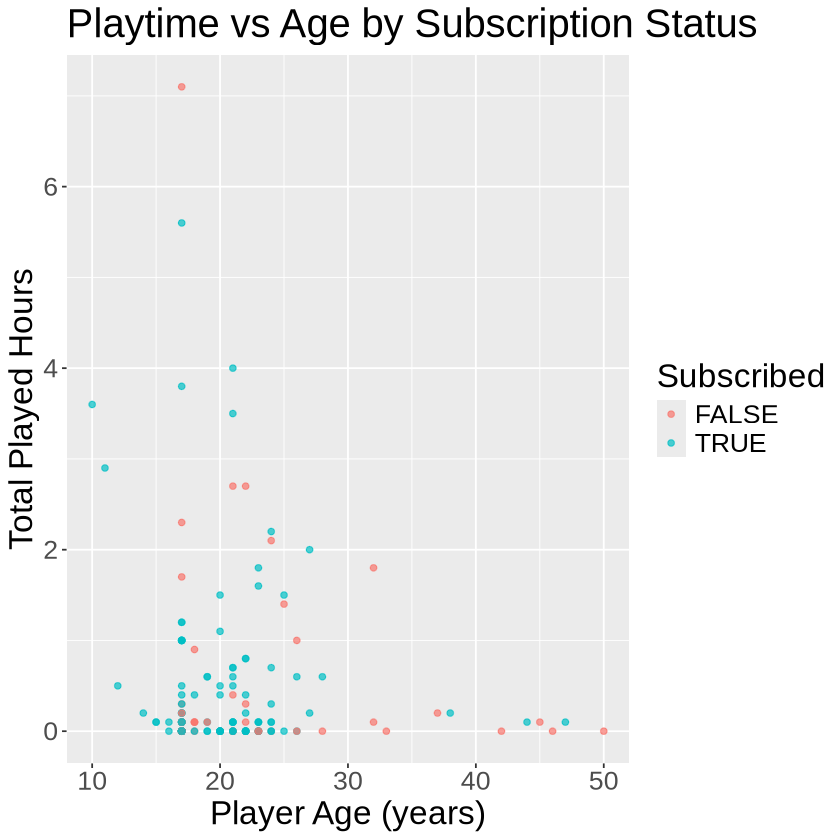

In [27]:
# playtime vs age

players |> 
    filter(played_hours <= 10 & Age <= 50) |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point(alpha = 0.7) +
    labs(
        title = "Playtime vs Age by Subscription Status",
        x = "Player Age (years)",
        y = "Total Played Hours",
        colour = "Subscribed"
    ) +
    theme(text = element_text(size = 20))

### Interpretation
There is no strong pattern between age and playtime, although some younger players show higher playtime. Both subscribed and non subscribed players appear across all ages, meaning age likely isn't a strong predictor of subcription.

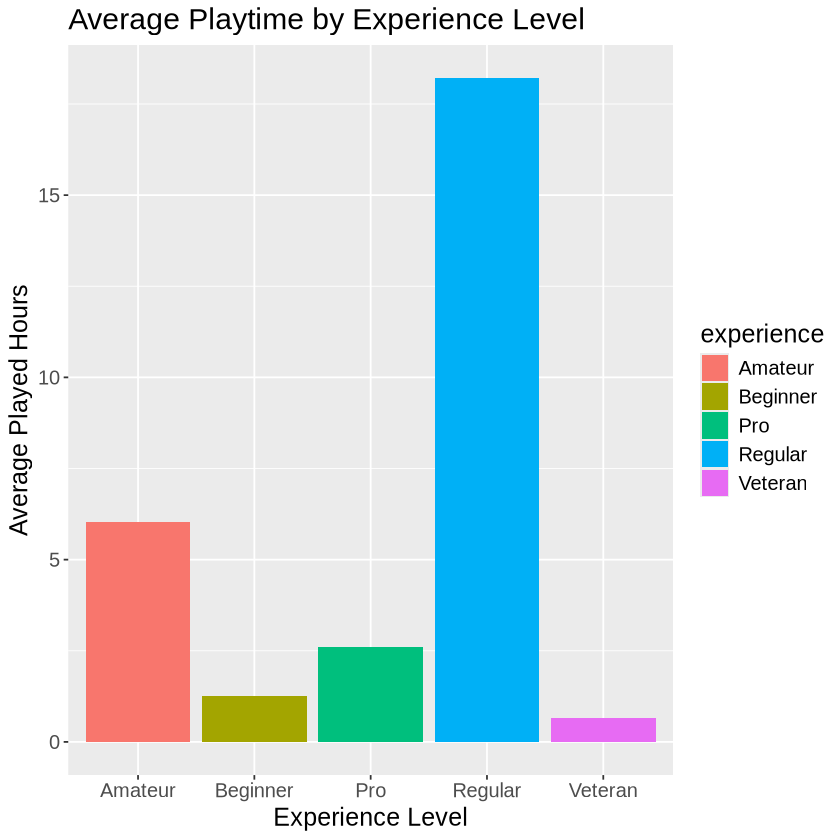

In [28]:
# average playtime by experience

players |>
    group_by(experience) |>
    summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2)) |>
    ggplot(aes(x = experience, y = mean_played_hours, fill = experience)) +
    geom_col() +
    labs(
        title = "Average Playtime by Experience Level",
        x = "Experience Level",
        y = "Average Played Hours"
    ) +
    theme(text = element_text(size = 15))

### Interpretation
The bar chart shows that `Regular` players have the highest average playtime, while `Veteran` players play less than expected. This could mean that "Regular" players represent the most consisten and engaged group, while "Veterans" might have played a lot in the past but are now less active.

## 5. Methods and Plan
I will answer **question 1**: What player characteristics and behaviours are most predictive of subscribing to a game related newsletter, and how do these features differ between various player types?

I plan to use the **k-nearest neighbours (k-NN)** classification methods to predict whether a player subscribes to the newsletter (`subscribe`) based on their level of enegagement and characteristics such as `played_hours`, `experience`, and `age`.

### Why This Method is Appropriate 
The k-NN methods is appropriate because the response variable is categorical (subscribed or not). It is simple, non-parametric, and does not assume a linear relationship between variables.

### Assumptions
This method assumes that similar players have similar outcomes and that all predictors are on comparable scales. Numeric variables will be standardized before modeling to meet this condition.

### Potential Limitations
k-NN is sensitive to outliers and irrelevant predictors, which may reduce accuracy. It can also be computationally slower for larger datasets and depends on choosing an appropriate `k`.

### Model Comparison and Selection
Different `k` values will be compared using **cross-validation**. The model with the highest validation accuracy will be selected.

### Data Processing Plan
After cleaning and encoding variables, the dataset will be split into **training (75%)** and **testing (25%)** sets. Numeric variables will be standardized, and categorical variables such as `experience` will be encoded. Cross-validation on the training set will be used to tune `k` before evaluating the model on the test data.
